In [175]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### A - Chargement des bibliothèques

In [239]:

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
import math
# Visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulation de données
import numpy as np
import pandas as pd

# Outils divers
from tqdm import tqdm
from collections import defaultdict
from tqdm.notebook import tqdm_notebook
%matplotlib inline


In [186]:
# Configuration de la visualisation
sns.set(style="darkgrid", rc={'figure.figsize':(11.7,8.27)})

### B - Lecture les jeux de données ( train.csv)

In [187]:
train_cols =['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','y']
train_df = pd.read_csv('train.csv', usecols = train_cols)

#### B -1 Visualisation et exploration préliminaire de la trame de données d'enrainement (avec les dimensions (train)

In [188]:
dimensions_train_data = print(f'dimensions train data = {train_df.shape}')
train_df.head()

dimensions train data = (809, 20)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
0,-10,23.3,UKNW,12.8,296.11856,51.65,31,1021.0,8,-2.989814,0,1.726170,Wednesday,0.0,US,False,36,16.0934,20,-0.316667
1,-12,26.7,UKNW,21.1,321.86800,71.39,17,1022.0,6,0.799323,8,4.533188,Wednesday,0.0,B6,False,36,16.0934,20,-0.433333
2,-4,25.6,UKNW,16.7,321.86800,57.87,21,1012.5,7,4.603120,20,7.972838,Sunday,0.0,UA,False,34,16.0934,178,-0.200000
3,20,22.8,UKNW,12.2,300.94658,51.18,30,1021.5,7,-5.979628,49,3.452340,Tuesday,0.0,B6,False,33,16.0934,200,0.083333
4,-8,25.6,UKNW,18.3,296.11856,64.03,24,1005.4,8,-11.095607,0,13.223229,Wednesday,0.0,US,False,38,16.0934,20,-0.300000


#### B - 2 Exploration les valeurs possibles des variables de type catégorie

In [189]:
train_df["x3"].unique()

array(['UKNW'], dtype=object)

In [190]:
# Décision prise de supprimer cette variable avec une seule valeur ('UKNW')
train_df = train_df.drop('x3',1)

In [191]:
train_df["x16"].unique()

array([False,  True])

### C - Séparation les variables explicatives et la variable expliquée 

In [193]:
X=train_df.drop({'y'}, 1)
Y = train_df['y']

#### C - 1 Séléction des variables explicatives à base du tableau de synthése (seuil: p-value < 5%) - 1ere itération

In [54]:

X=pd.get_dummies(X)
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
Xstand = scalerX.fit_transform(X.values)
scalerY = StandardScaler()
Ystand = scalerY.fit_transform(Y.values.reshape(-1,1))
Xstand=pd.DataFrame(Xstand)
Xstand.columns=X.columns
Xstand.index=X.index
Ystand=pd.DataFrame(Ystand)
Ystand.columns=["y"]

modele=sm.OLS(Ystand,Xstand.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(Xstand.assign(const=1))
resultats.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     364.7
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        20:06:38   Log-Likelihood:                -77.779
No. Observations:                 809   AIC:                             213.6
Df Residuals:                     780   BIC:                             349.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
x1                0.9261      0.011     84.933      0.000       0.905       0.948
x2               -0.0298      0.067     -0.443      0.658      -0.162       0.102
x4                0.0179      0.063      0.285      0.776      -0.105       0.141
x5                0.0097      0.019      0.504      0.614      -0.028       0.047
x6               -0.0416      0.074     -0.559      0.576      -0.188       0.104
x7               -0.0146      0.014     -1.073      0.284      -0.041       0.012
x8               -0.0380      0.011     -3.355      0.001      -0.060      -0.016
x9                0.0243      0.011      2.195      0.028       0.003       0.046
x10               0.0373      0.012      3.224      0.001       0.015       0.060
x11               0.0177      0.013      1.389      0.165      -0.007       0.043
x12               0.0095      0.012      0.768      0.443      -0.015       0.034
x14               0.0427      0.016      2.698      0.007       0.012       0.074
x16              -0.0017      0.016     -0.108      0.914      -0.032       0.029
x17               0.1274      0.011     11.846      0.000       0.106       0.149
x18              -0.0142      0.011     -1.315      0.189      -0.035       0.007
x19              -0.0265      0.028     -0.946      0.344      -0.082       0.029
x13_Friday       -0.0050      0.008     -0.591      0.555      -0.022       0.012
x13_Monday        0.0051      0.008      0.621      0.535      -0.011       0.021
x13_Saturday     -0.0211      0.010     -2.212      0.027      -0.040      -0.002
x13_Sunday        0.0021      0.009      0.233      0.816      -0.015       0.020
x13_Thursday     -0.0126      0.009     -1.441      0.150      -0.030       0.005
x13_Tuesday       0.0254      0.008      3.128      0.002       0.009       0.041
x13_Wednesday    -0.0029      0.008     -0.364      0.716      -0.018       0.013
x15_9E           -0.0255      0.010     -2.598      0.010      -0.045      -0.006
x15_AA           -0.0075      0.010     -0.763      0.446      -0.027       0.012
x15_B6           -0.0064      0.013     -0.478      0.633      -0.033       0.020
x15_DL           -0.0157      0.012     -1.278      0.202      -0.040       0.008
x15_EV           -0.0033      0.010     -0.319      0.750      -0.023       0.017
x15_UA           -0.0335      0.020     -1.684      0.093      -0.073       0.006
x15_US            0.0599      0.016      3.716      0.000       0.028       0.092
const         -2.134e-16      0.010  -2.24e-14      1.000      -0.019       0.019
==============================================================================
Omnibus:                      287.708   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1109.694
Skew:                           1.655   Prob(JB):         

#### C - 2 Séléction des variables explicatives à base du tableau de synthése (seuil: p-value < 5%) - 2ere itération (Aprés la supprission des variables dont leurs p-valus > 5%)

In [10]:
train_df1 = X.drop({'x2','x4','x6','x11','x12','x13_Friday','x13_Monday','x13_Sunday','x13_Wednesday','x15_AA','x15_B6','x15_DL','x15_EV','x15_UA','x16','x18','x19'},axis= 1)

In [11]:
dimensions_train_data = print(f'dimensions train data = {train_df1.shape}')


Y=train_df["y"]
#train_df1=pd.get_dummies(train_df1)
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
Xstand = scalerX.fit_transform(train_df1.values)
scalerY = StandardScaler()
Ystand = scalerY.fit_transform(Y.values.reshape(-1,1))
Xstand=pd.DataFrame(Xstand)
Xstand.columns=train_df1.columns
Xstand.index=train_df1.index
Ystand=pd.DataFrame(Ystand)
Ystand.columns=["y"]

modele=sm.OLS(Ystand,Xstand.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(Xstand.assign(const=1))
resultats.summary()

#y_baseline = Y_train.mean()

dimensions train data = (809, 13)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     772.0
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        18:52:43   Log-Likelihood:                -91.426
No. Observations:                 809   AIC:                             210.9
Df Residuals:                     795   BIC:                             276.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
x1               0.9278      0.011     86.376      0.000       0.907       0.949
x5              -0.0054      0.013     -0.413      0.680      -0.031       0.020
x7              -0.0041      0.010     -0.406      0.685      -0.024       0.016
x8              -0.0335      0.011     -3.072      0.002      -0.055      -0.012
x9               0.0249      0.010      2.450      0.014       0.005       0.045
x10              0.0371      0.010      3.621      0.000       0.017       0.057
x14              0.0442      0.010      4.461      0.000       0.025       0.064
x17              0.1273      0.010     12.303      0.000       0.107       0.148
x13_Saturday    -0.0182      0.010     -1.843      0.066      -0.038       0.001
x13_Thursday    -0.0082      0.010     -0.819      0.413      -0.028       0.011
x13_Tuesday      0.0289      0.010      2.904      0.004       0.009       0.048
x15_9E          -0.0222      0.010     -2.203      0.028      -0.042      -0.002
x15_US           0.0741      0.013      5.653      0.000       0.048       0.100
const        -6.939e-17      0.010  -7.22e-15      1.000      -0.019       0.019
==============================================================================
Omnibus:                      258.812   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              874.280
Skew:                           1.526   Prob(JB):                    1.42e-190
Kurtosis:                       7.077   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### C - 3 Séléction des variables explicatives à base du tableau de synthése (seuil: p-value < 5%) - 3ème itération (Aprés la supprission des variables dont leurs p-valus > 5%)

In [12]:
train_df2 = train_df1.drop({'x5','x7'},axis= 1)
dimensions_train_data = print(f'dimensions train data = {train_df2.shape}')


Y=train_df["y"]
#train_df1=pd.get_dummies(train_df1)
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
Xstand = scalerX.fit_transform(train_df2.values)
scalerY = StandardScaler()
Ystand = scalerY.fit_transform(Y.values.reshape(-1,1))
Xstand=pd.DataFrame(Xstand)
Xstand.columns=train_df2.columns
Xstand.index=train_df2.index
Ystand=pd.DataFrame(Ystand)
Ystand.columns=["y"]

modele=sm.OLS(Ystand,Xstand.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(Xstand.assign(const=1))
resultats.summary()



#y_baseline = Y.mean()

dimensions train data = (809, 11)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     914.3
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        18:52:43   Log-Likelihood:                -91.602
No. Observations:                 809   AIC:                             207.2
Df Residuals:                     797   BIC:                             263.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
x1               0.9287      0.011     87.401      0.000       0.908       0.950
x8              -0.0320      0.010     -3.073      0.002      -0.052      -0.012
x9               0.0252      0.010      2.496      0.013       0.005       0.045
x10              0.0373      0.010      3.696      0.000       0.017       0.057
x14              0.0444      0.010      4.482      0.000       0.025       0.064
x17              0.1272      0.010     12.495      0.000       0.107       0.147
x13_Saturday    -0.0180      0.010     -1.831      0.067      -0.037       0.001
x13_Thursday    -0.0077      0.010     -0.782      0.435      -0.027       0.012
x13_Tuesday      0.0288      0.010      2.899      0.004       0.009       0.048
x15_9E          -0.0217      0.010     -2.180      0.030      -0.041      -0.002
x15_US           0.0776      0.010      7.686      0.000       0.058       0.097
const        -1.527e-16      0.010  -1.59e-14      1.000      -0.019       0.019
==============================================================================
Omnibus:                      259.700   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              880.151
Skew:                           1.530   Prob(JB):                    7.55e-192
Kurtosis:                       7.092   Cond. No.                         1.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### C - 4 Séléction des variables explicatives à base du tableau de synthése (seuil: p-value < 5%) - 4 ème itération (Aprés la supprission des variables dont leurs p-valus > 5%)

In [25]:
train_df3 = train_df2.drop({'x13_Thursday','x13_Saturday'},axis= 1)
dimensions_train_data = print(f'dimensions train data = {train_df3.shape}')


Y=train_df["y"]
#train_df1=pd.get_dummies(train_df1)
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
Xstand = scalerX.fit_transform(train_df3.values)
scalerY = StandardScaler()
Ystand = scalerY.fit_transform(Y.values.reshape(-1,1))
Xstand=pd.DataFrame(Xstand)
Xstand.columns=train_df3.columns
Xstand.index=train_df3.index
Ystand=pd.DataFrame(Ystand)
Ystand.columns=["y"]

modele=sm.OLS(Ystand,Xstand.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(Xstand.assign(const=1))
resultats.summary()

dimensions train data = (809, 9)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1115.
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        19:48:14   Log-Likelihood:                -93.453
No. Observations:                 809   AIC:                             206.9
Df Residuals:                     799   BIC:                             253.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
x1              0.9305      0.011     87.824      0.000       0.910       0.951
x8             -0.0306      0.010     -2.944      0.003      -0.051      -0.010
x9              0.0244      0.010      2.412      0.016       0.005       0.044
x10             0.0375      0.010      3.719      0.000       0.018       0.057
x14             0.0443      0.010      4.481      0.000       0.025       0.064
x17             0.1282      0.010     12.602      0.000       0.108       0.148
x13_Tuesday     0.0323      0.010      3.333      0.001       0.013       0.051
x15_9E         -0.0216      0.010     -2.172      0.030      -0.041      -0.002
x15_US          0.0795      0.010      7.909      0.000       0.060       0.099
const       -1.076e-16      0.010  -1.12e-14      1.000      -0.019       0.019
==============================================================================
Omnibus:                      255.852   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              849.473
Skew:                           1.515   Prob(JB):                    3.46e-185
Kurtosis:                       7.003   Cond. No.                         1.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### D Standarisation et découpage des données (partie entrainement-->70% et partie test-->30%)

In [195]:
scalerX = StandardScaler()
Xstand = scalerX.fit_transform(train_df3.values)
scalerY = StandardScaler()
Ystand = scalerY.fit_transform(Y.values.reshape(-1,1))
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(Xstand, Ystand, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

# number of features
X_train.shape[1]
 
 

9

### E - Création modéle de regression linéaire à base des 9 variables pertinentes
référence: https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression

In [ ]:

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(0, 9))}]
 #specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

In [173]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

### F  - Représentation graphique des résultats de simulation

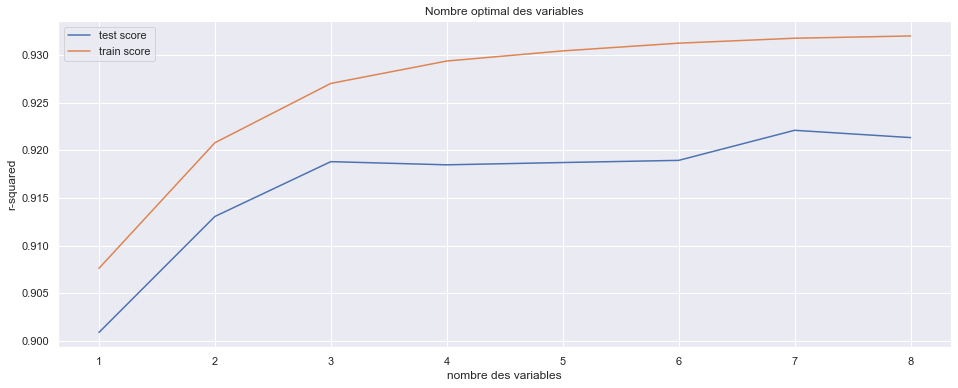

In [231]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('nombre des variables')
plt.ylabel('r-squared')
plt.title("Nombre optimal des variables")
plt.legend(['test score', 'train score'], loc='upper left')

#### Conclusion :  la simulation à base du modéle de la régression multiples montre que 7 variables est optimal pour avoir un bon score, effectivement le calcul du coifficient de détermination R*R est pertient avec 7 variables 

In [197]:
# final model
n_features_optimal = 7

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9019390360686509


### G  - Le modéle de k-plus proches voisins avec 10 plies

In [237]:
X_train, X_test, y_train, y_test = train_test_split(Xstand, Ystand, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=50)

from sklearn.model_selection import KFold
def KNeighborsRegressorCV(k):
    history = defaultdict(list)
    kf = KFold(n_splits=10)
    

    for train_index, val_index in kf.split(X_train):
    
        x_cv_train, x_cv_val = X_train[train_index,:], X_train[val_index,:]
        y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]
        neigh = KNeighborsRegressor(n_neighbors=k)
        neigh.fit(x_cv_train, y_cv_train)
         #Record performances par plis
        neigh.score(x_cv_train, y_cv_train)
        history['train'].append(neigh.score(x_cv_train, y_cv_train))
        history['val'].append(neigh.score(x_cv_val, y_cv_val))
        return np.mean(history['train']), np.mean(history['val'])

history = defaultdict(list)
for k in range(1, 8):
    t, v = KNeighborsRegressorCV(k)
    history['train'].append(t)
    history['val'].append(v)

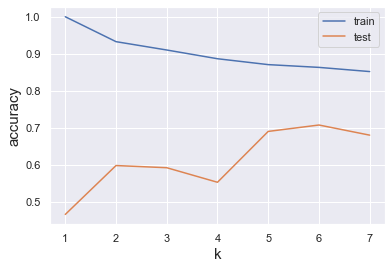

In [238]:
f, ax = plt.subplots(1,1)
ax.plot(range(1, 8), history['train'], label="train")
ax.plot(range(1, 8), history['val'], label="test")
ax.set_xlabel('k', fontsize=15)
ax.set_ylabel('accuracy', fontsize=15)
ax.legend()

In [169]:
neigh = KNeighborsRegressor(n_neighbors=6)
neigh.fit(Xstand, Ystand)
neigh.score(Xstand, Ystand)

0.8215903097967148

In [172]:
neigh_best = KNeighborsRegressor(n_neighbors=6).fit(X_train, y_train)
neigh_best.score(X_test, y_test)

0.7406933522177525

## Conclusion: Il s'est avéré que le modéle donne le meilleur résultat avec (k=1) proches voisins avec un score moins que celui obtenu avec le modéle de la régression linaire multiples

In [232]:
train_cols =['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19']
test_df = pd.read_csv('test.csv', usecols = train_cols)

In [219]:
test_df = pd.get_dummies(test_df)

Test_dummies = pd.get_dummies(test_df)
X_selection = Test_dummies[['x1','x8','x9','x10','x14','x17','x13_Tuesday','x15_9E','x15_US']].values

In [225]:
X_selection_scaled = scalerX.transform(X_selection)
predictionY = model_cv.predict(X_selection_scaled)

### H - Génération du fichier de prédiction avec le modéle retenu (regression linaire multiple)

In [227]:
Pred =pd.DataFrame(predictionY, columns=['predictionY'])

In [229]:
Pred.to_csv('Pred.csv')